In [8]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.05  # previous pdf hatch linewidth

from scipy.stats import chi2
from scipy.stats import linregress
from numba import njit,prange
%matplotlib inline

In [9]:
full_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[41.,50.],'lonlim':[0.,20.]}
normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon = ds.LON
lat = ds.LAT
H = ds.SH

In [ ]:
# xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_ERA20C/EUf/*/'+str(year)+'/ICE.*.'+str(year)+'.11.01-*.nc')

In [3]:
# function for seasonal mean
def season_mean(ds, calendar="standard"):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = (
        month_length.groupby("time.season") / month_length.groupby("time.season").sum()
    )

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby("time.season").sum(dim="time")

In [ ]:
# first_year = 1902
# last_year = 2010
first_year = 1960
last_year = 2100
# les_season_mean = np.zeros(((last_year-first_year+1),4,126,201))
# les_season_max = np.zeros(((last_year-first_year+1),4,126,201))

# save_folder = 'saved_data_MAR_ERA20C'
# save_folder = 'saved_data_MAR_ECearth3'
# save_folder = 'saved_data_MAR_MPI'
save_folder = 'saved_data_MAR_MPI85'
les_season_mean = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_meanC.npy')
les_season_max = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_maxC.npy')

for year in range(2050,2075):
    print(year,end=' ')
    # year_name = ! ls {'/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_ERA20C/EUf/*/'+str(year)+'/ICE.*.'+str(year)+'.01*.nc'}
    # year_name = ! ls {'/bettik/menegozm/MARout/EUe/*/'+str(year)+'/ICE.*.'+str(year)+'.01*.nc'}
    year_name = ! ls {'/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/*/'+str(year)+'/ICE.*.'+str(year)+'.01*.nc'}
    ds = xr.open_mfdataset(year_name[0][:-11]+'*.nc')
    season_mean_year=season_mean(ds.MBcp).sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
    les_season_mean[year-first_year] = season_mean_year
    season_max_year=(ds.MBcp).groupby("time.season").max(dim="time").sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
    les_season_max[year-first_year] = season_max_year
    if (year)%1==0:
        print('Save')
        np.save('/home/philinat/Stage-M2/'+save_folder+'/les_season_meanC.npy', les_season_mean)
        np.save('/home/philinat/Stage-M2/'+save_folder+'/les_season_maxC.npy', les_season_max)

        
# les_season_mean = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_meanC.npy')
# les_season_max = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_maxC.npy')

# nt,ns,nlat,nlon = np.shape(les_season_max)
# for j in range(nlat):
#     for i in range(nlon):
#         for s in range(ns):
#             les_season_mean[:,s,j,i][les_season_mean[:,s,j,i]==0.] = np.mean(les_season_mean[:,s,j,i][les_season_mean[:,s,j,i]>0.])
#             les_season_max[:,s,j,i][les_season_max[:,s,j,i]==0.] = np.quantile(les_season_max[:,s,j,i],0.5)
            
# np.save('/home/philinat/Stage-M2/'+save_folder+'/les_season_meanC.npy', les_season_mean)
# np.save('/home/philinat/Stage-M2/'+save_folder+'/les_season_maxC.npy', les_season_max)

2050 Save
2051 Save
2052 Save
2053 Save
2054 Save
2055 Save
2056 Save
2057 Save
2058 Save
2059 Save
2060 Save
2061 Save
2062 Save
2063 Save
2064 Save
2065 Save
2066 Save
2067 Save
2068 Save
2069 Save
2070 Save
2071 Save
2072 Save
2073 Save
2074 

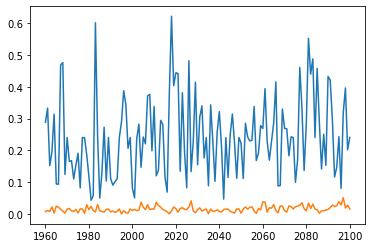

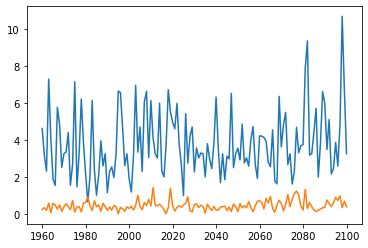

In [3]:
imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
save_folder = 'saved_data_MAR_MPI85'
les_season_mean = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_meanC.npy')
les_season_max = np.load('/home/philinat/Stage-M2/'+save_folder+'/les_season_maxC.npy')
plt.figure()
plt.plot(np.arange(1960,2101,1),les_season_mean[:,0,jmin,imin])
plt.plot(np.arange(1960,2101,1),les_season_mean[:,0,jmax,imax])
plt.figure()
plt.plot(np.arange(1960,2101,1),les_season_max[:,0,jmin,imin])
plt.plot(np.arange(1960,2101,1),les_season_max[:,0,jmax,imax])


In [1]:
first_year = 1959
last_year = 2101

for year in range(first_year,last_year+1):#
    print(year)
    year_name = ! ls {'/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/*/'+str(year)+'/ICE.*.'+str(year)+'.01*.nc'}
    # year_name = ! ls {'/bettik/menegozm/MARout/EUe/*/'+str(year)+'/ICE.*.'+str(year)+'.01*.nc'}
    print(year_name)


1959
["ls: cannot access '/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/*/1959/ICE.*.1959.01*.nc': No such file or directory"]
1960
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1960/ICE.y46.1960.01.01-31.nc']
1961
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1961/ICE.y46.1961.01.01-31.nc']
1962
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1962/ICE.y46.1962.01.01-31.nc']
1963
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1963/ICE.y46.1963.01.01-31.nc']
1964
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1964/ICE.y46.1964.01.01-31.nc']
1965
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y46/1965/ICE.y46.1965.01.01-31.nc', '/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y47/1965/ICE.y47.1965.01.01-31.nc']
1966
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y47/1966/ICE.y47.1966.01.01-31.nc']
1967
['/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_MPI/EUy/y47/1967/ICE.y47.1967.01

In [10]:
imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon_ = ds.LON[jmin:jmax,imin:imax]
lat_ = ds.LAT[jmin:jmax,imin:imax]
H_ = ds.SH[jmin:jmax,imin:imax]

In [11]:
#Minimization algorithm
@njit()
def nelder_mead(f, x_start ,args=(),
                step=0.1, no_improve_thr=1e-8,
                no_improv_break=10, max_iter=200,
                alpha=1., gamma=2., rho=-0.5, sigma=0.5):
    '''
        Pure Python/Numpy implementation of the Nelder-Mead algorithm.
        Reference: https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method
        https://www.youtube.com/watch?v=vOYlVvT3W80
        
        
        @param f (function): function to minimize, must return a scalar score
            and operate over a numpy array of the same dimensions as x_start
        @param x_start (numpy array): initial position
        @param step (float): look-around radius in initial step
        @no_improv_thr,  no_improv_break (float, int): break after no_improv_break iterations with
            an improvement lower than no_improv_thr
        @max_iter (int): always break after this number of iterations.
            Set it to 0 to loop indefinitely.
        @alpha, gamma, rho, sigma (floats): parameters of the algorithm
            (see Wikipedia page for reference)
        return: tuple (best parameter array, best score, iterations)
    '''

    # init
    dim = len(x_start)
    prev_best = f(x_start, *args)
    no_improv = 0
    
    points = np.zeros((dim+1,dim))
    scores = np.zeros((dim+1))
    
    points[0]=x_start ; scores[0]=prev_best
    
    for i in range(1,dim+1):
        points[i] = np.copy(x_start)
        points[i,i-1] += step
        scores[i] = f(points[i], *args)

    # simplex iter
    iters = 0
    # break after max_iter
    while iters < max_iter:
        iters += 1
        
        # order
        ss = np.argsort(scores)
        points = points[ss]
        scores = scores[ss]
        best = scores[0] 
        

        # break after no_improv_break iterations with no improvement
        # print( '...best so far:', best)

        if best < prev_best - no_improve_thr:
            no_improv = 0
            prev_best = best
        else:
            no_improv += 1

        if no_improv >= no_improv_break:
            return points[0],scores[0],iters

        # centroid
        x0 = np.sum(points[:-1],axis=0)/dim
        # reflection
        xr = x0 + alpha*(x0 - points[-1])
        rscore = f(xr, *args)
        if scores[0] <= rscore < scores[-2]:
            points[-1] = xr
            scores[-1] = rscore
            continue

        # expansion
        if rscore < scores[0]:
            xe = x0 + gamma*(x0 - points[-1])
            escore = f(xe, *args)
            if escore < rscore:
                points[-1] = xe
                scores[-1] = escore
                continue
            else:
                points[-1] = xr
                scores[-1] = rscore
                continue

        # contraction
        xc = x0 + rho*(x0 - points[-1])
        cscore = f(xc, *args)
        if cscore < scores[-1]:
            points[-1] = xc
            scores[-1] = cscore
            continue

        # reduction
        for i in range(1,dim+1):
            points[i] = points[0] + sigma*(points[i] - points[0])
            scores[i] = f(points[i], *args)
        
    return points[0],scores[0],iters

### Gumbel fit
@njit()
def gumbel_nllh(params,x):
    μ,σ = params
    s = (x-μ)/σ
    return np.sum(np.log(σ)+s+np.exp(-s))

@njit()
def fit_gumbel(x):
    '''
    Algorithm derived in this video : https://www.youtube.com/watch?v=p818JALlO44
    '''
    x_ = np.mean(x)
    σ = np.sqrt(np.sum((x-x_)**2)/(np.shape(x)[0]-1) *6)/np.pi
    if σ==0. or x_==np.nan:
        return np.array([ np.nan , np.nan])
    for i in range(4):
        e = np.exp(-x/σ)
        e_ = np.mean(e)
        xe_ = np.mean(x*e)
        σ -= (σ - x_ + xe_/e_) / (1+ ( e_*np.mean(x**2*e) - xe_**2 )/e_**2/σ**2)
    return np.array([ -σ*np.log(np.mean(np.exp(-x/σ))) , σ ])

### GEV fit
@njit()
def gev_nllh(params,x):
    μ,σ,ξ = params
    if ξ==0.:
        return gumbel_nllh(params[:2],x)
    a = 1+ξ*(x-μ)/σ
    a[a<0.001]=0.001
    nllhs = np.log(σ) + (1+1/ξ)*np.log(a) + a**(-1/ξ)
    nllhs[a==0.001] = 100
    return np.sum(nllhs)

### NS-GEV fit
@njit()
def nsgev_nllh(params,x):
    μ0,σ0,ξ,μt,σt = params
    y = np.arange(-(len(x)-1)/2,(len(x)+1)/2)
    if ξ==0.:
        s = (x-μ0-y*μt)/(σ0+y*σt)
        return np.sum(np.log(σ0+y*σt)+s+np.exp(-s))
    
    a = 1+ξ*(x-μ0-y*μt)/(σ0+y*σt)
    a[a<0.001]=0.001
    nllhs = np.log(σ0+y*σt) + (1+1/ξ)*np.log(a) + a**(-1/ξ)
    nllhs[a==0.001] = 100
    return np.sum(nllhs)

@njit()
def nsgev_nllh_fit(params,x,gev_params):
    μt,σt = params
    μ0,σ0,ξ = gev_params
    y = np.arange(-(len(x)-1)/2,(len(x)+1)/2)
    if ξ==0.:
        s = (x-μ0-y*μt)/(σ0+y*σt)
        return np.sum(np.log(σ0+y*σt)+s+np.exp(-s))
    
    a = 1+ξ*(x-μ0-y*μt)/(σ0+y*σt)
    a[a<0.001]=0.001
    nllhs = np.log(σ0+y*σt) + (1+1/ξ)*np.log(a) + a**(-1/ξ)
    nllhs[a==0.001] = 100
    return np.sum(nllhs)

@njit()
def fit_nsgev(x):
    μ,σ = fit_gumbel(x)
    params,nllh0 = nelder_mead(gev_nllh, np.array([μ,σ,0.]),args=(x,),step=0.05,no_improve_thr=1e-6)[:2]
    μ,σ,ξ = params
    μt,σt = nelder_mead(nsgev_nllh_fit, np.array([0.,0.]),args=(x,np.array([μ,σ,ξ,])),step=0.1,no_improve_thr=1e-3)[0]
    params,nllh1 = nelder_mead(nsgev_nllh, np.array([μ,σ,ξ,μt,σt]),args=(x,),step=0.001,no_improve_thr=1e-6)[:2]
    return params, 2*(nllh0-nllh1)
    
@njit(parallel=True)
def seasonal_nsgev_signif(les_season_max):
    nt,ns,nlat,nlon = np.shape(les_season_max)
    season_mu_sig_xi_mut_sigt = np.zeros((ns,nlat,nlon,5))
    season_signif = np.zeros((ns,nlat,nlon))
    for s in prange(ns):
        for j in prange(nlat):
            for i in prange(nlon):
                season_mu_sig_xi_mut_sigt[s,j,i] , season_signif[s,j,i] = fit_nsgev(les_season_max[:,s,j,i])
    return season_mu_sig_xi_mut_sigt,season_signif

def seasonal_nsgev_pvalue(les_season_max):
    params , signif = seasonal_nsgev_signif(les_season_max)
    return params , 1 - chi2.cdf(signif,2)

In [12]:
# models = ['MAR_ERA20C']
# models = ['MAR_ECearth3']
models = ['MAR_MPI85']
les_params = []
les_pvalue = []
for m,model in enumerate(models):
    print(model)
    les_season_max = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_maxC.npy')[:,:,jmin:jmax,imin:imax]
    params,pvalue = seasonal_nsgev_pvalue(les_season_max) # params=μ0,σ0,ξ,μt,σt
    les_params.append(params)
    les_pvalue.append(pvalue)
nsgev_models = np.append(np.array(les_params),np.reshape(np.array(les_pvalue),np.shape(les_pvalue)+(1,)),axis=4)



MAR_MPI85


In [13]:
les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_'+model+'/les_season_meanC.npy')[:,:,jmin:jmax,imin:imax]
origin_T=np.full(les_season_mean.shape[1:4],np.nan)
slope_T=np.full(les_season_mean.shape[1:4],np.nan)
pvalue_T=np.full(les_season_mean.shape[1:4],np.nan)
nt = les_season_mean.shape[0]
for i in range(les_season_mean.shape[3]):
    for j in range(les_season_mean.shape[2]):
        for season in range(4):
            # linregress_T = linregress(np.arange(les_season_mean.shape[0]), les_season_mean[:,season,j,i])
            linregress_T = linregress(np.arange(-(nt-1)/2,(nt+1)/2), les_season_mean[:,season,j,i])
            origin_T[season][j][i] = linregress_T.intercept
            slope_T[season][j][i] = linregress_T.slope
            pvalue_T[season][j][i] = linregress_T.pvalue

In [14]:
def Qgev(μ,σ,ξ,q):
    Q = np.zeros(np.shape(μ))
    gumbel = np.abs(ξ)<10**-3
    gev = np.logical_not(gumbel)
    Q[gumbel] = μ[gumbel] - σ[gumbel]*np.log(-np.log(q))
    Q[gev] = μ[gev] + σ[gev]/ξ[gev]*((-np.log(q))**(-ξ[gev]) -1)
    return Q

def plot_mean_max_trends_model(title):
    f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=2)
    for m in range(2):
        for i in range(4):
            ax = axs[i+m*4]
            if m==0:
                cb = ax.pcolormesh(lon_,lat_,origin_T[i],levels=np.linspace(0,5,11),cmap='YlGnBu')
            else:
                cb = ax.pcolormesh(lon_,lat_,100*100*slope_T[i]/origin_T[i],levels=np.linspace(-100,100,21),cmap='BrBg')
                signif=np.where(pvalue_T[i,:,:]<0.05,True,False)
                ax.contourf(lon_,lat_,signif,hatches=["", "...."], alpha=0.)
        axs[3+m*4].colorbar(cb, label= ['mm/d','% /centuries'][m])
    axs.format(**multiplot_format,suptitle='Mean convective precipitation in '+title,collabels=['DJF','MAM','JJA', 'SON'],rowlabels=['Mean','Trend'])

    params = nsgev_models[0]
    f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=6)
    for m,q in enumerate([5,50,95,5,50,95]):
        for i in range(4):
            ax = axs[i+m*4]
            Q0 = Qgev(params[i,:,:,0],params[i,:,:,1],params[i,:,:,2],q/100)
            if m<3:
                cb = ax.pcolormesh(lon_,lat_,Q0,levels=np.linspace(0,30,13),cmap='YlGnBu')
            else:
                Qt = Qgev(params[i,:,:,3],params[i,:,:,4],params[i,:,:,2],q/100)
                cb = ax.pcolormesh(lon_,lat_,100*100*Qt/Q0,levels=np.linspace(-100,100,21),cmap='BrBg')
                signif=np.where(params[i,:,:,5]<0.05,True,False)
                ax.contourf(lon_,lat_,signif,hatches=["", "...."], alpha=0.)
        axs[3+m*4].colorbar(cb, label= ['mm/d','% /centuries'][int(m/3)])
    axs.format(**multiplot_format,suptitle='Extreme convective precipitation in '+title,collabels=['DJF','MAM','JJA', 'SON'],
               rowlabels=['q5','q50','q95','Trend \n q5','Trend \n q50','Trend \n q95'])

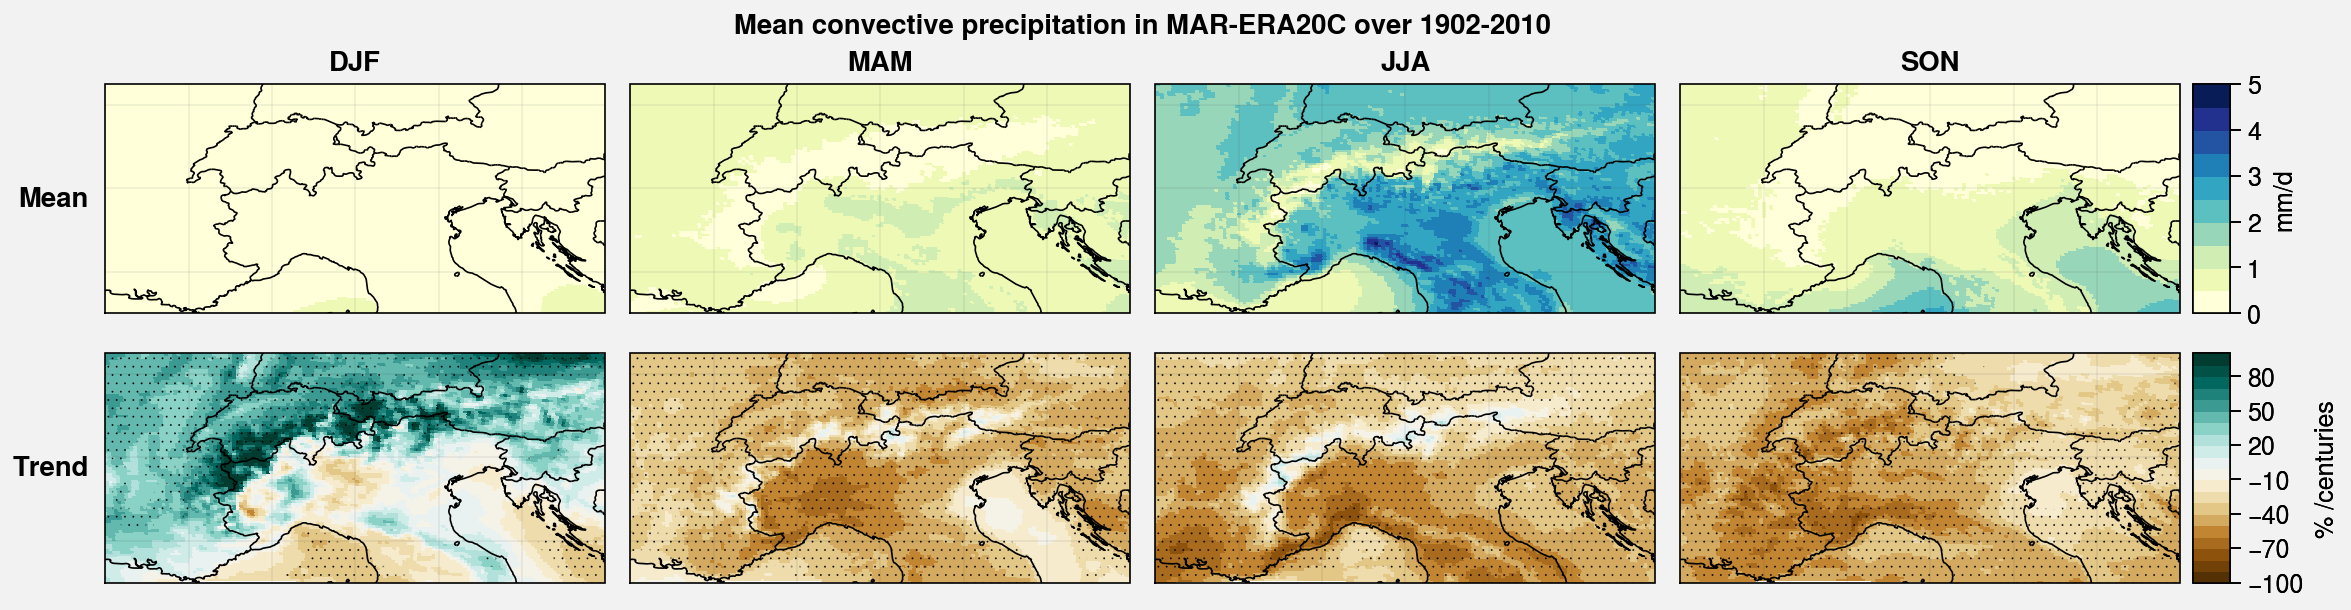

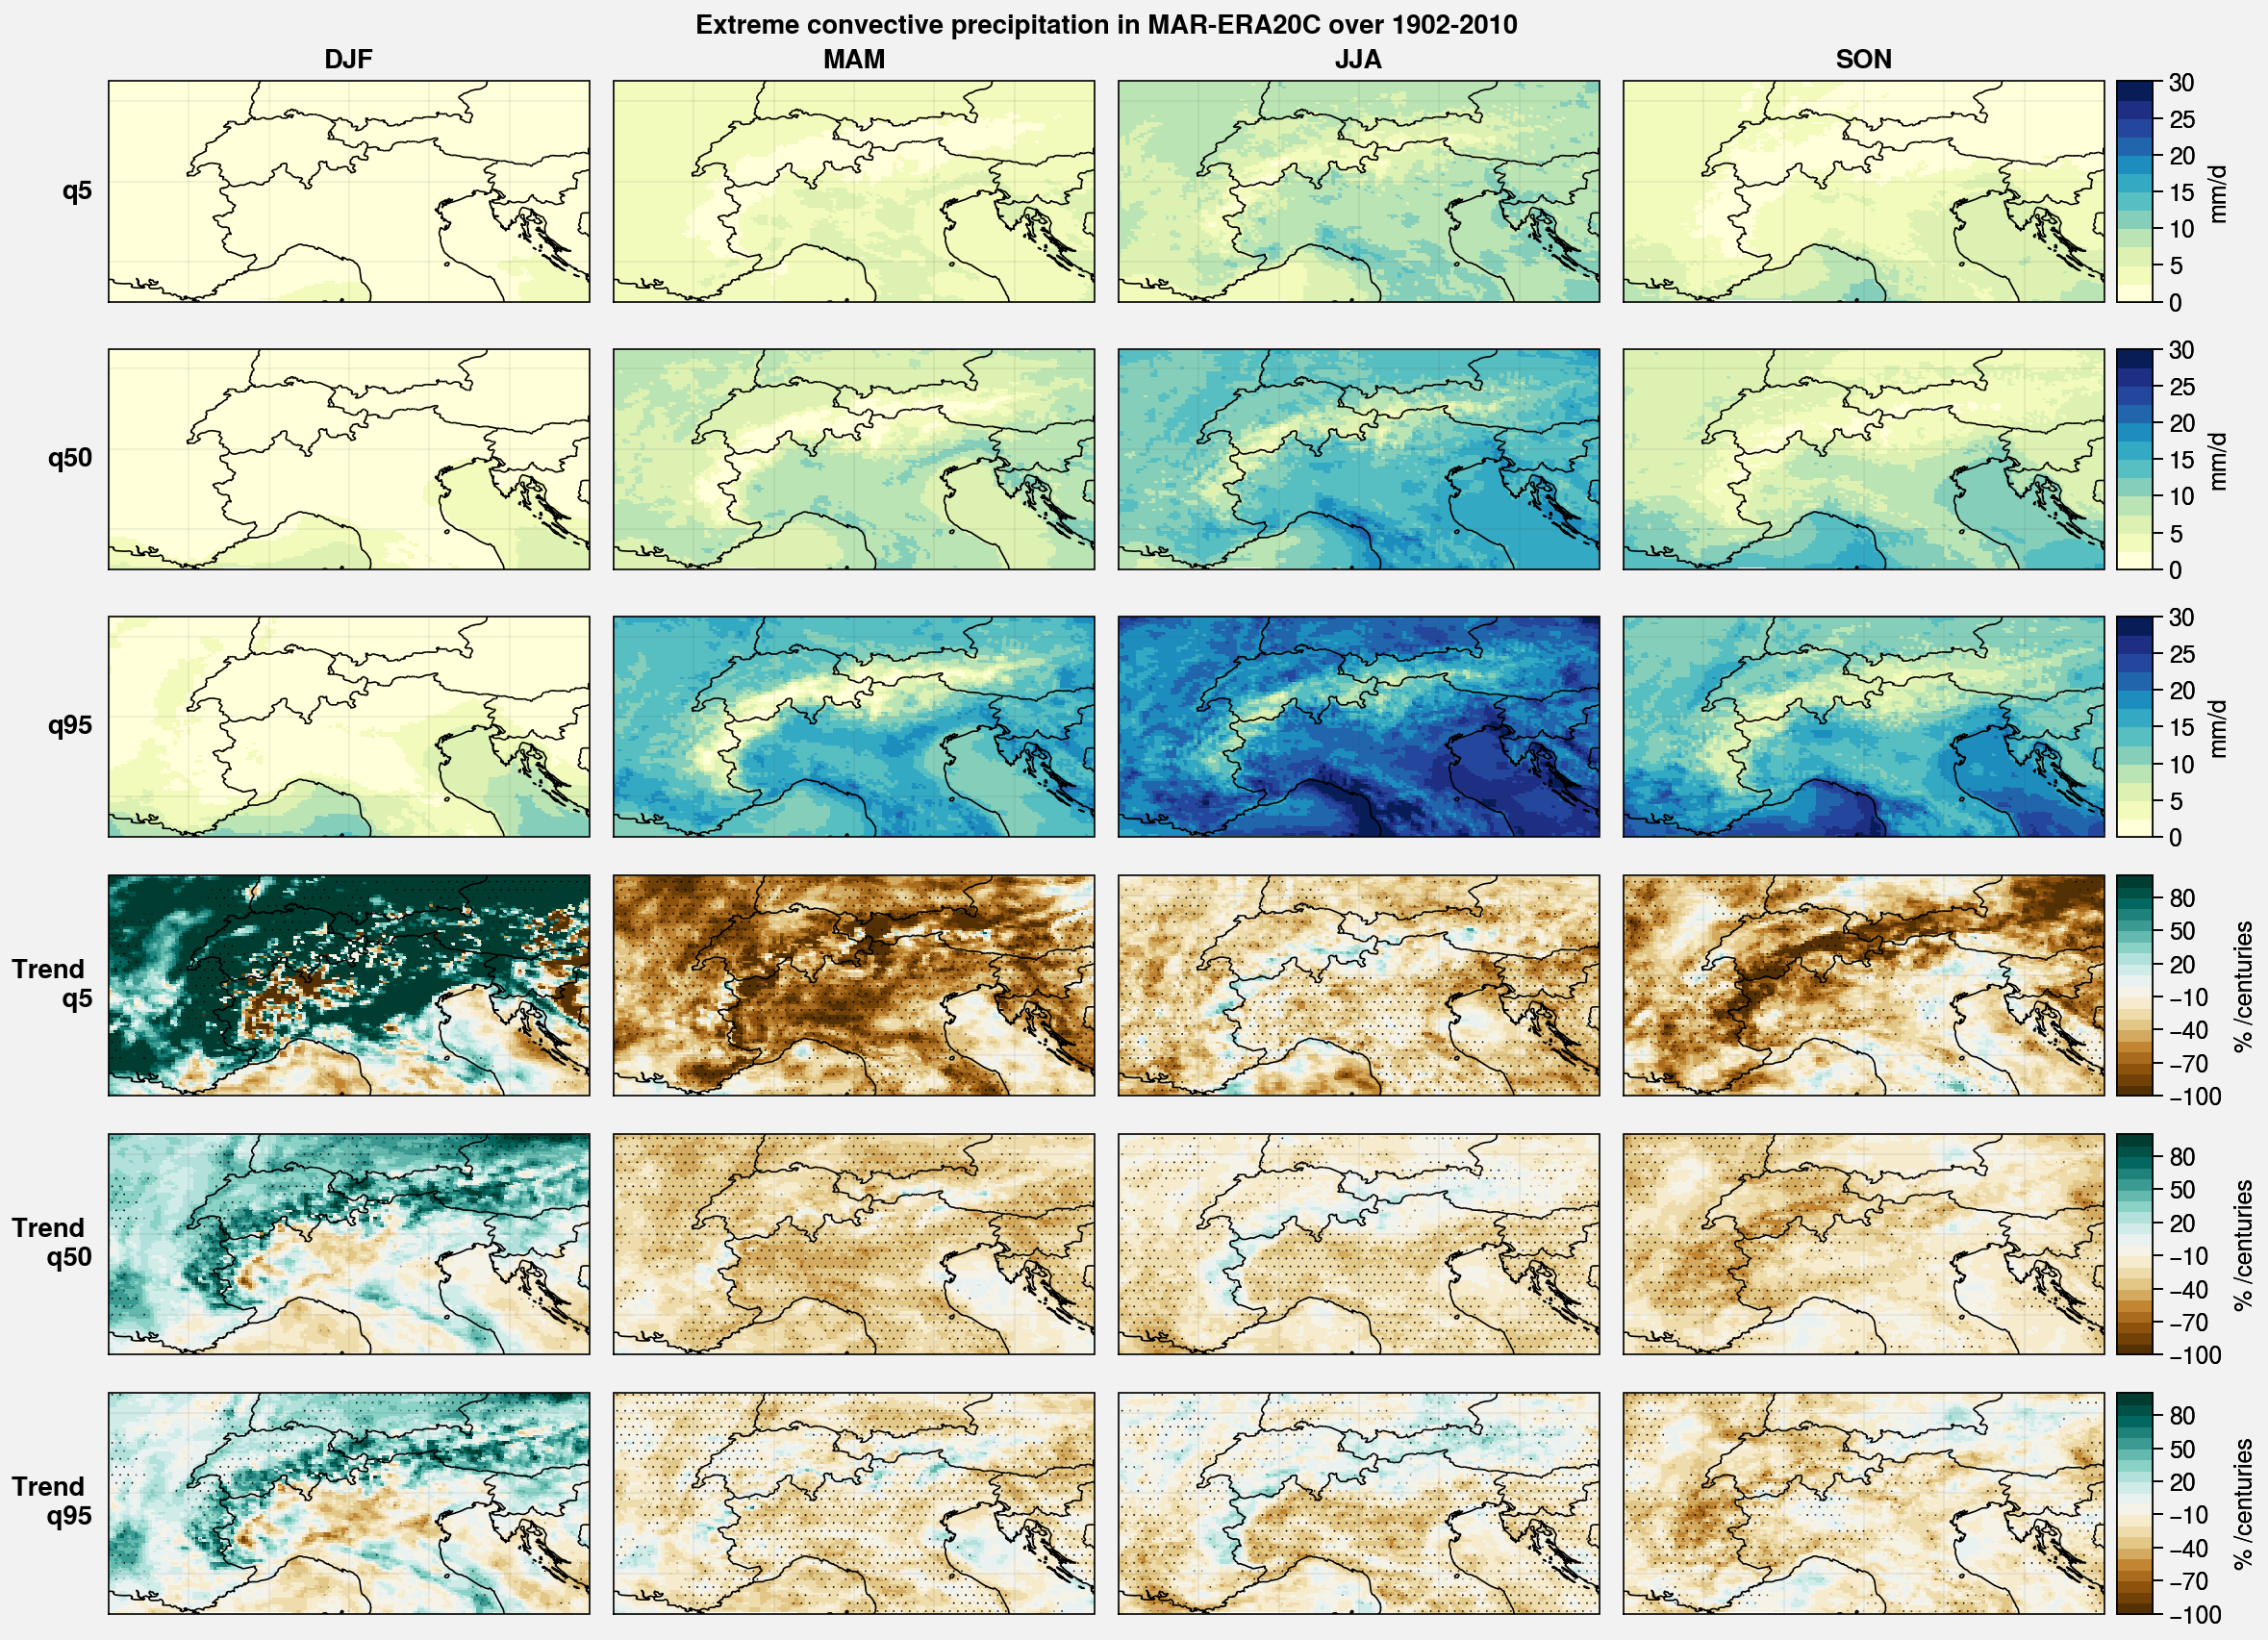

In [17]:
plot_mean_max_trends_model('MAR-ERA20C over 1902-2010')

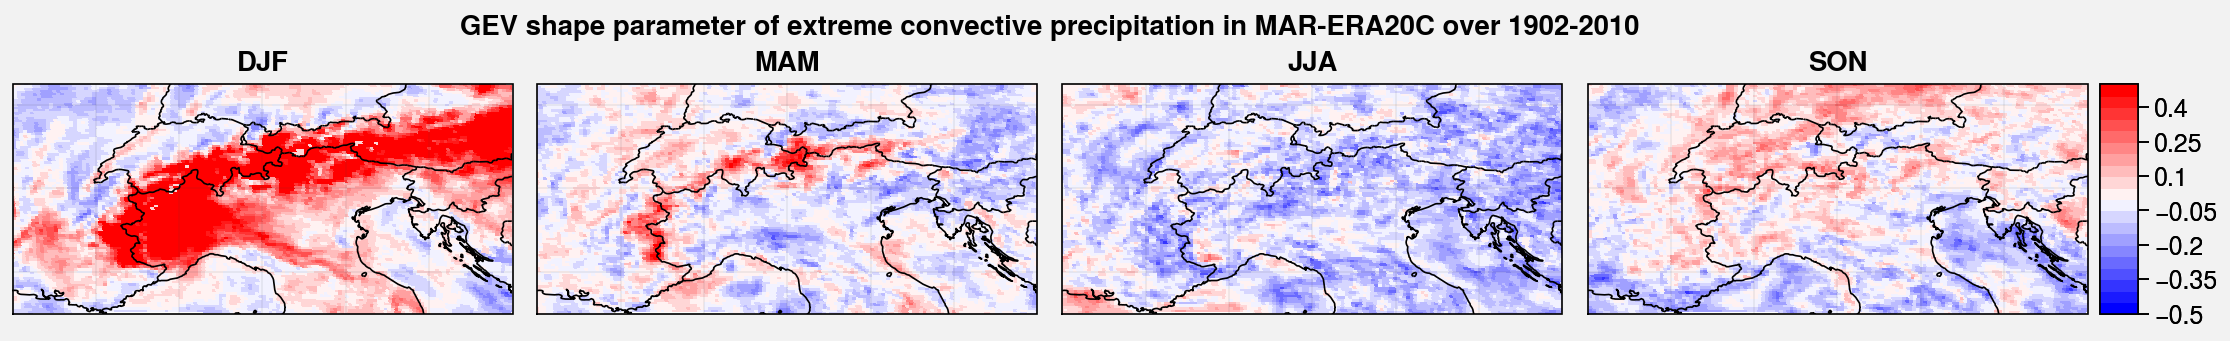

In [24]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=3)
for i in range(4):
    cb = axs[i].pcolormesh(lon_,lat_,params[i,:,:,2],levels=np.linspace(-0.5,0.5,21),cmap='bwr')
axs[3].colorbar(cb, label= '')
axs.format(**multiplot_format,suptitle='GEV shape parameter of extreme convective precipitation in MAR-ERA20C over 1902-2010',collabels=['DJF','MAM','JJA', 'SON'])

In [25]:
les_season_max = np.load('/home/philinat/Stage-M2/saved_data_MAR_ERA20C/les_season_maxC.npy')
les_season_mean = np.load('/home/philinat/Stage-M2/saved_data_MAR_ERA20C/les_season_meanC.npy')

f, axs = pplt.subplots(proj=('cyl',None),ncols=2, nrows=1, share=1, axwidth=5)

        m = axs[0].pcolormesh(ds.LON,ds.LAT,seasonal_mean[season,:,:],levels=np.linspace(0,10,21),cmap='YlGnBu' )
        axs[0].format(**normal_format,title=['DJF','MAM','JJA', 'SON'][season],titlesize='20px')

        axs[0].plot( [ ds.LON[j1,i1],ds.LON[j1,i2],ds.LON[j2,i2],ds.LON[j2,i1],ds.LON[j1,i1] ],
                  [ ds.LAT[j1,i1],ds.LAT[j1,i2],ds.LAT[j2,i2],ds.LAT[j2,i1],ds.LAT[j1,i1] ] , '--',color=colors[region],linewidth=2)
        if season==0:
            axh.plot( [ ds.LON[j1,i1],ds.LON[j1,i2],ds.LON[j2,i2],ds.LON[j2,i1],ds.LON[j1,i1] ],
                  [ ds.LAT[j1,i1],ds.LAT[j1,i2],ds.LAT[j2,i2],ds.LAT[j2,i1],ds.LAT[j1,i1] ] , '--',color=colors[region],linewidth=2)
        
        
        h = np.array(ds.SH[j1:j2,i1:i2].stack(z=('x','y')) )
        p = np.ndarray.flatten(seasonal_mean[season,j1:j2,i1:i2],order='F')
        #p = seasonal_mean[season,j1:j2,i1:i2].stack(z=('x','y'))
        axs[1].scatter( p, h ,marker='.',alpha=0.5,color=colors[region])

        m, b = np.polyfit(p, h, 1)
        x= np.linspace(np.min(p),np.max(p),2)
        axs[1].plot(x, m*x + b,color=colors[region])
t = np.arange(1902,2011,1)

a = 120
b = 100                  
x = les_season_max[:,3,a,b]

axs[1].scatter(t,x)

μ,σ,ξ,μt,σt = fit_nsgev(x)[0]
print(μ,σ,ξ)
quantiles=[0.05,0.5,0.95]
nt = len(x)
for j,p in enumerate(quantiles):
    start = (μ-nt/2*μt + (σ-nt/2*σt)/ξ*( (-np.log(p))**(-ξ) -1 ))
    end = (μ+nt/2*μt + (σ+nt/2*σt)/ξ*( (-np.log(p))**(-ξ) -1 ))
    axs[1].plot([t[0],t[-1]],[start,end],'--k')
plt.ylabel('mm/d')
plt.xlabel('year')

IndentationError: unexpected indent (3722975457.py, line 4)

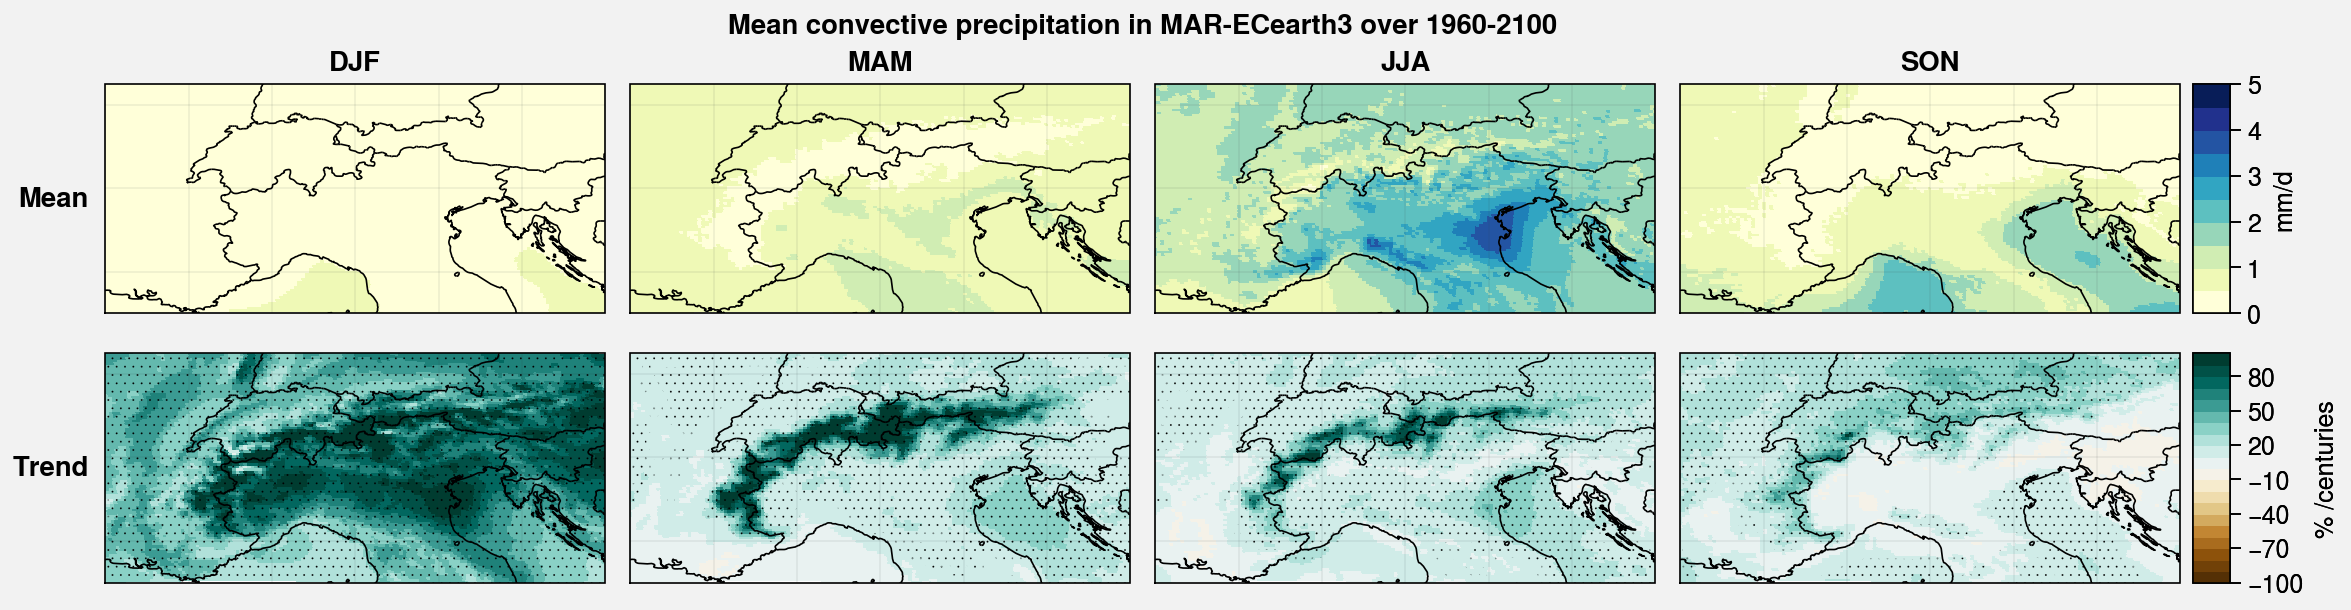

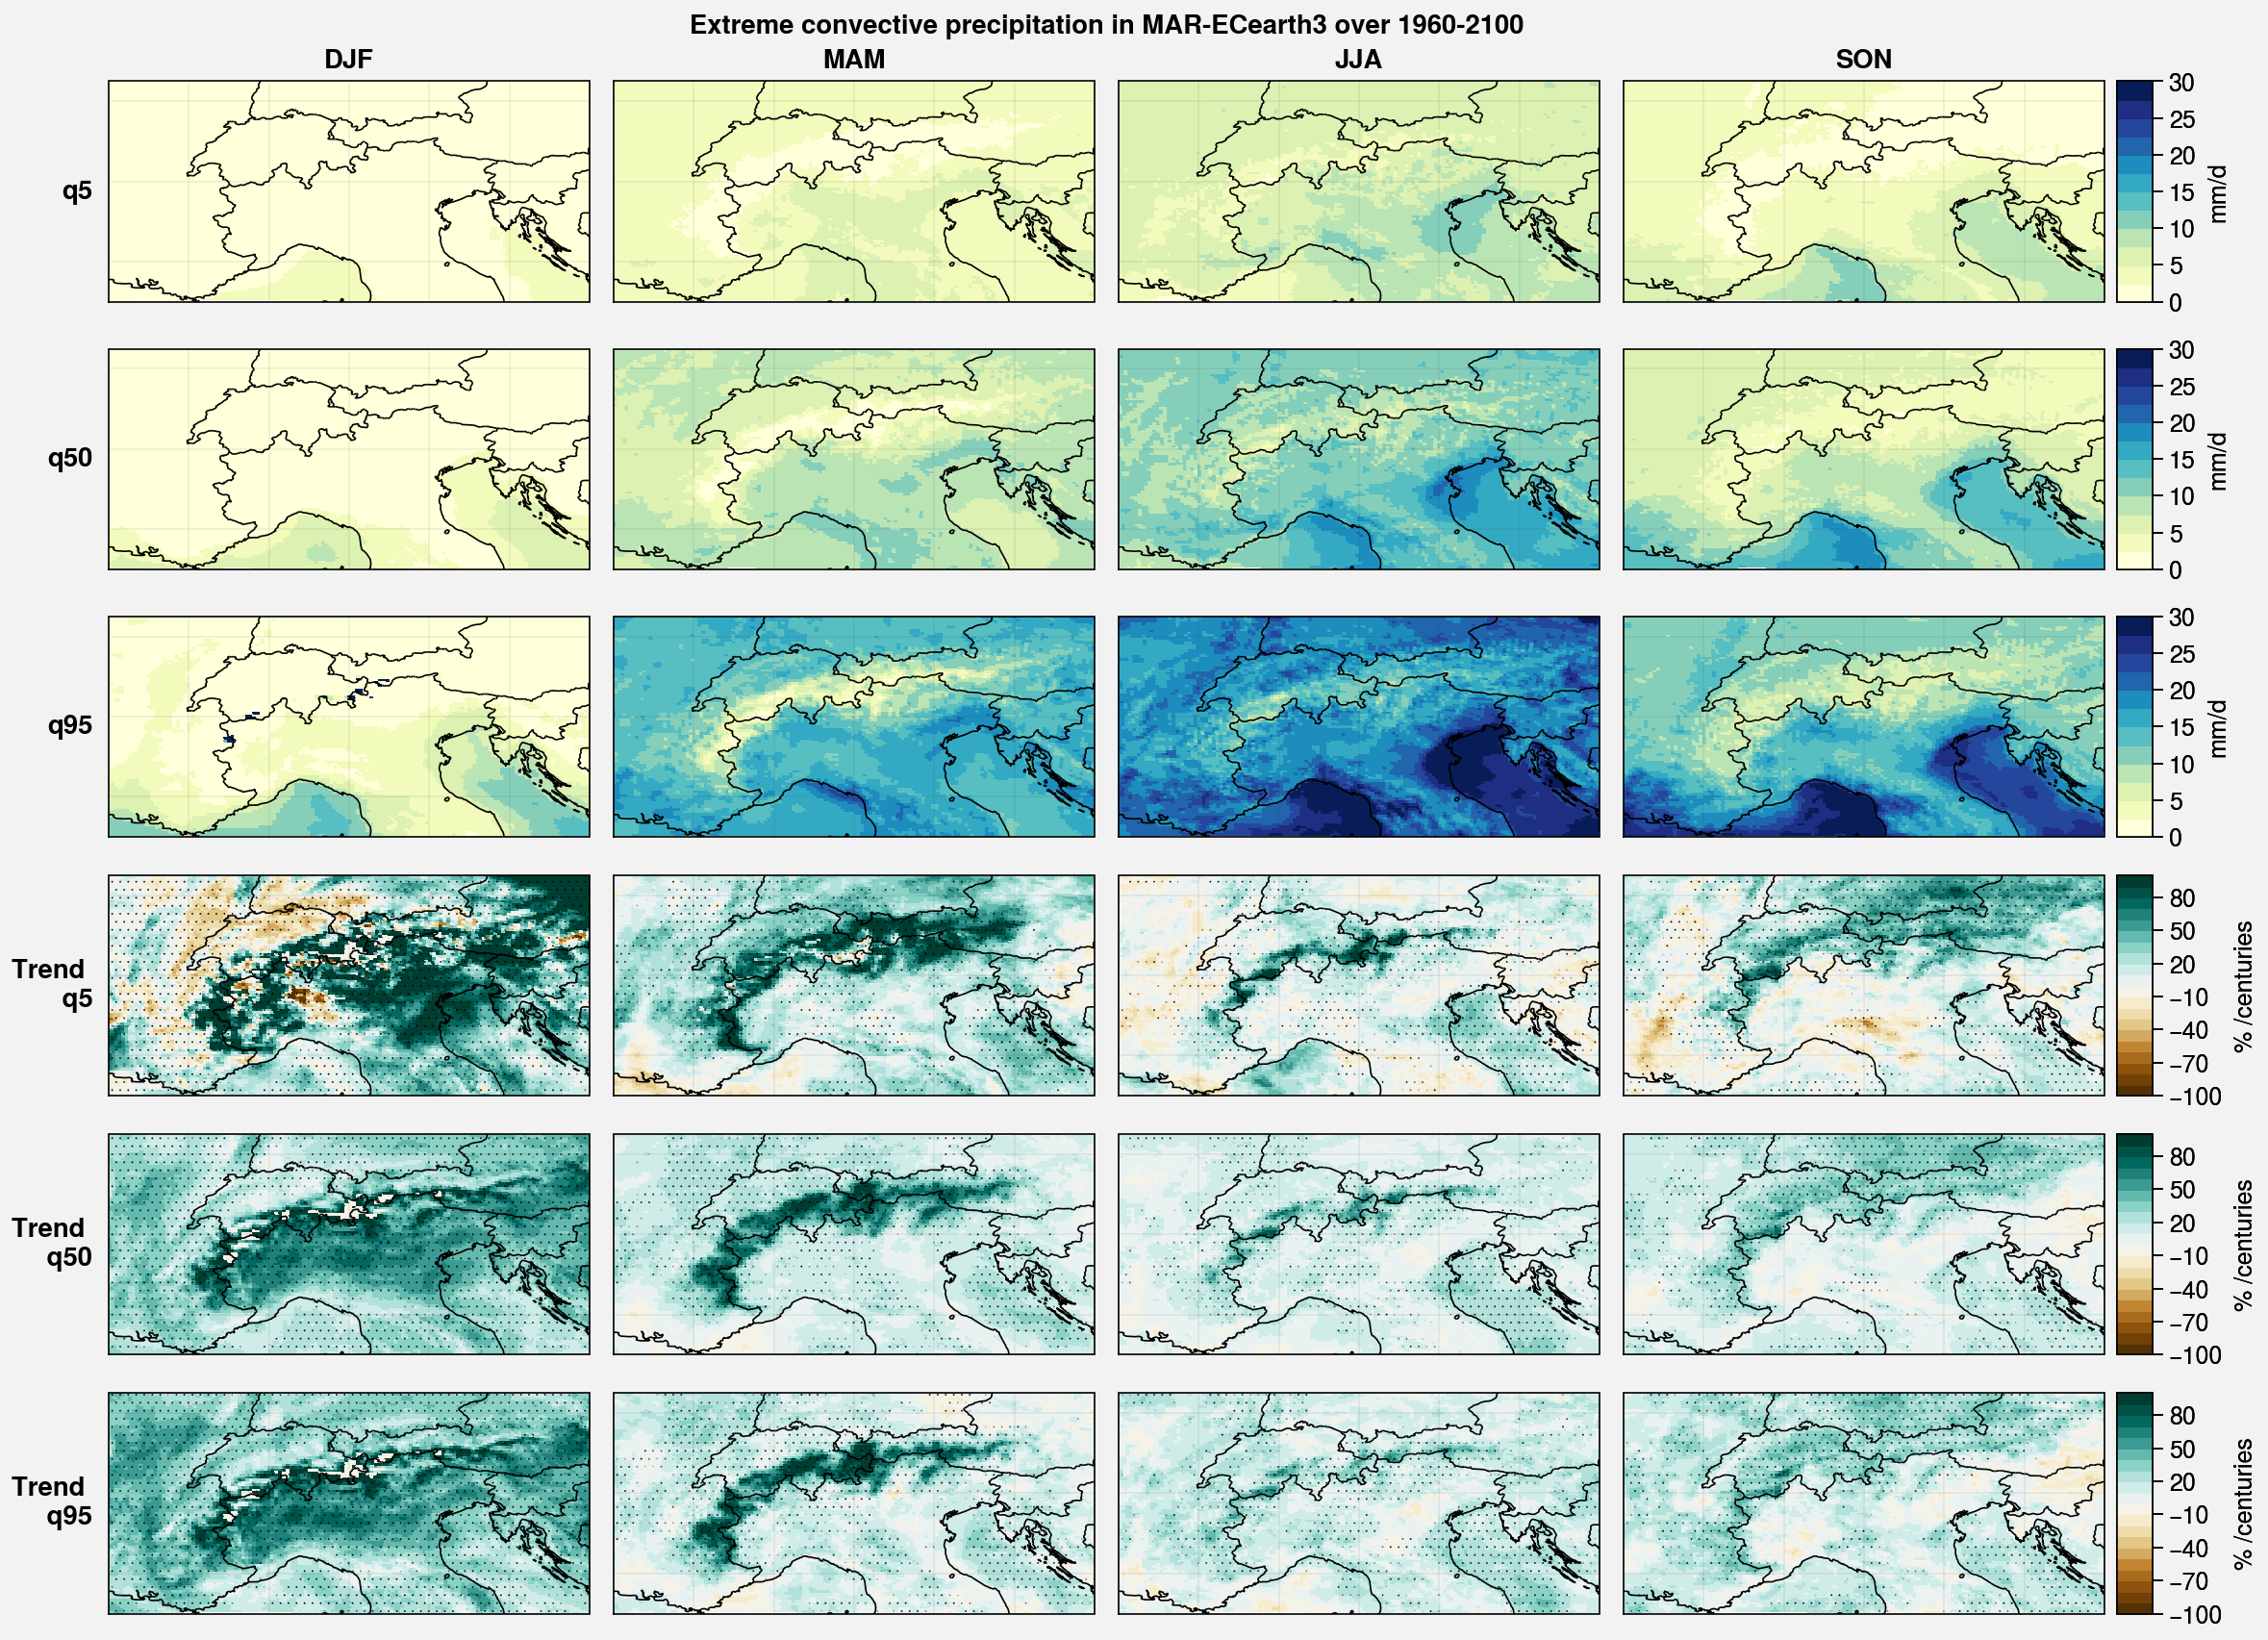

In [18]:
plot_mean_max_trends_model('MAR-ECearth3 over 1960-2100')

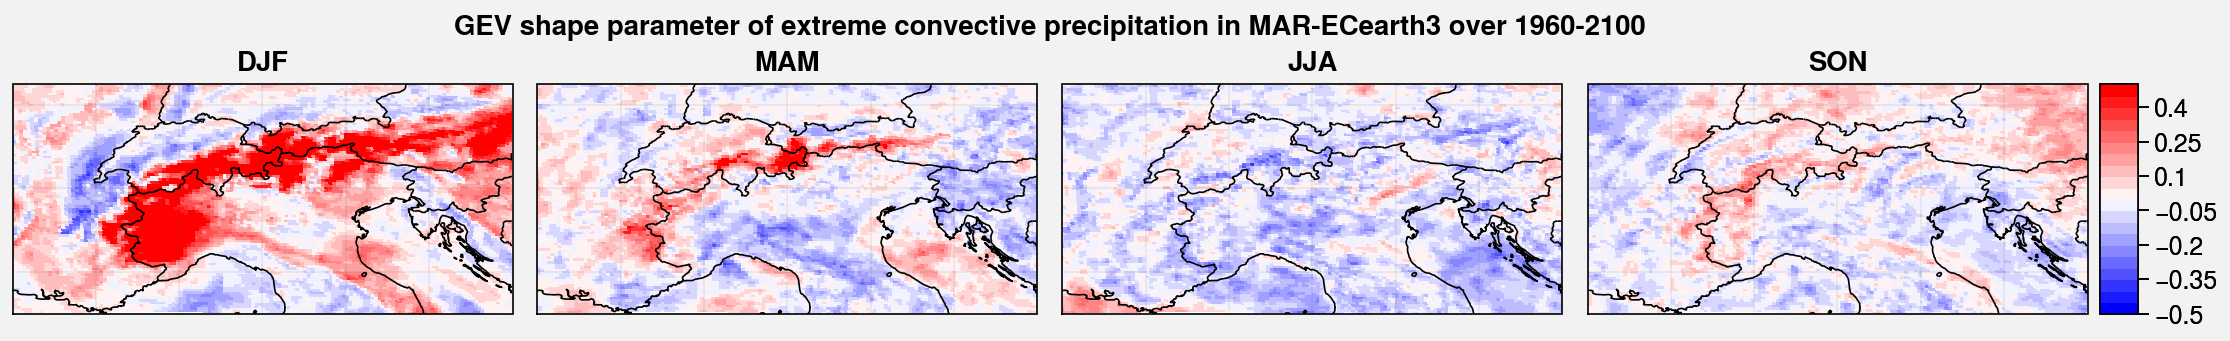

In [20]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=1)
for i in range(4):
    cb = axs[i].pcolormesh(lon_,lat_,params[i,:,:,2],levels=np.linspace(-0.5,0.5,21),cmap='bwr')
axs[3].colorbar(cb, label= '')
axs.format(**multiplot_format,suptitle='GEV shape parameter of extreme convective precipitation in MAR-ECearth3 over 1960-2100',collabels=['DJF','MAM','JJA', 'SON'])

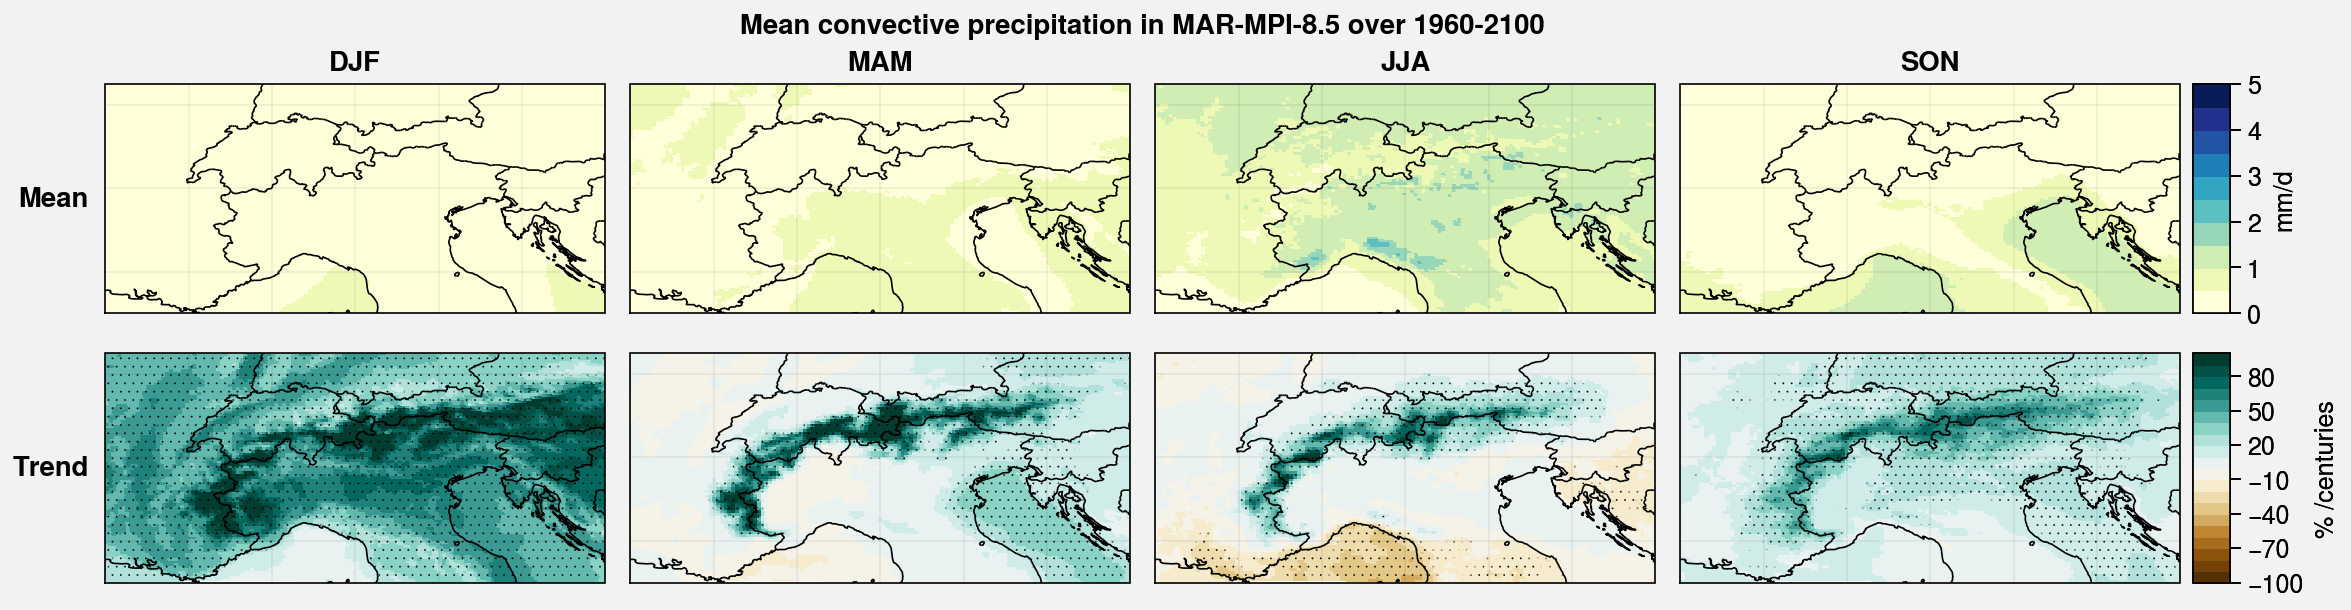

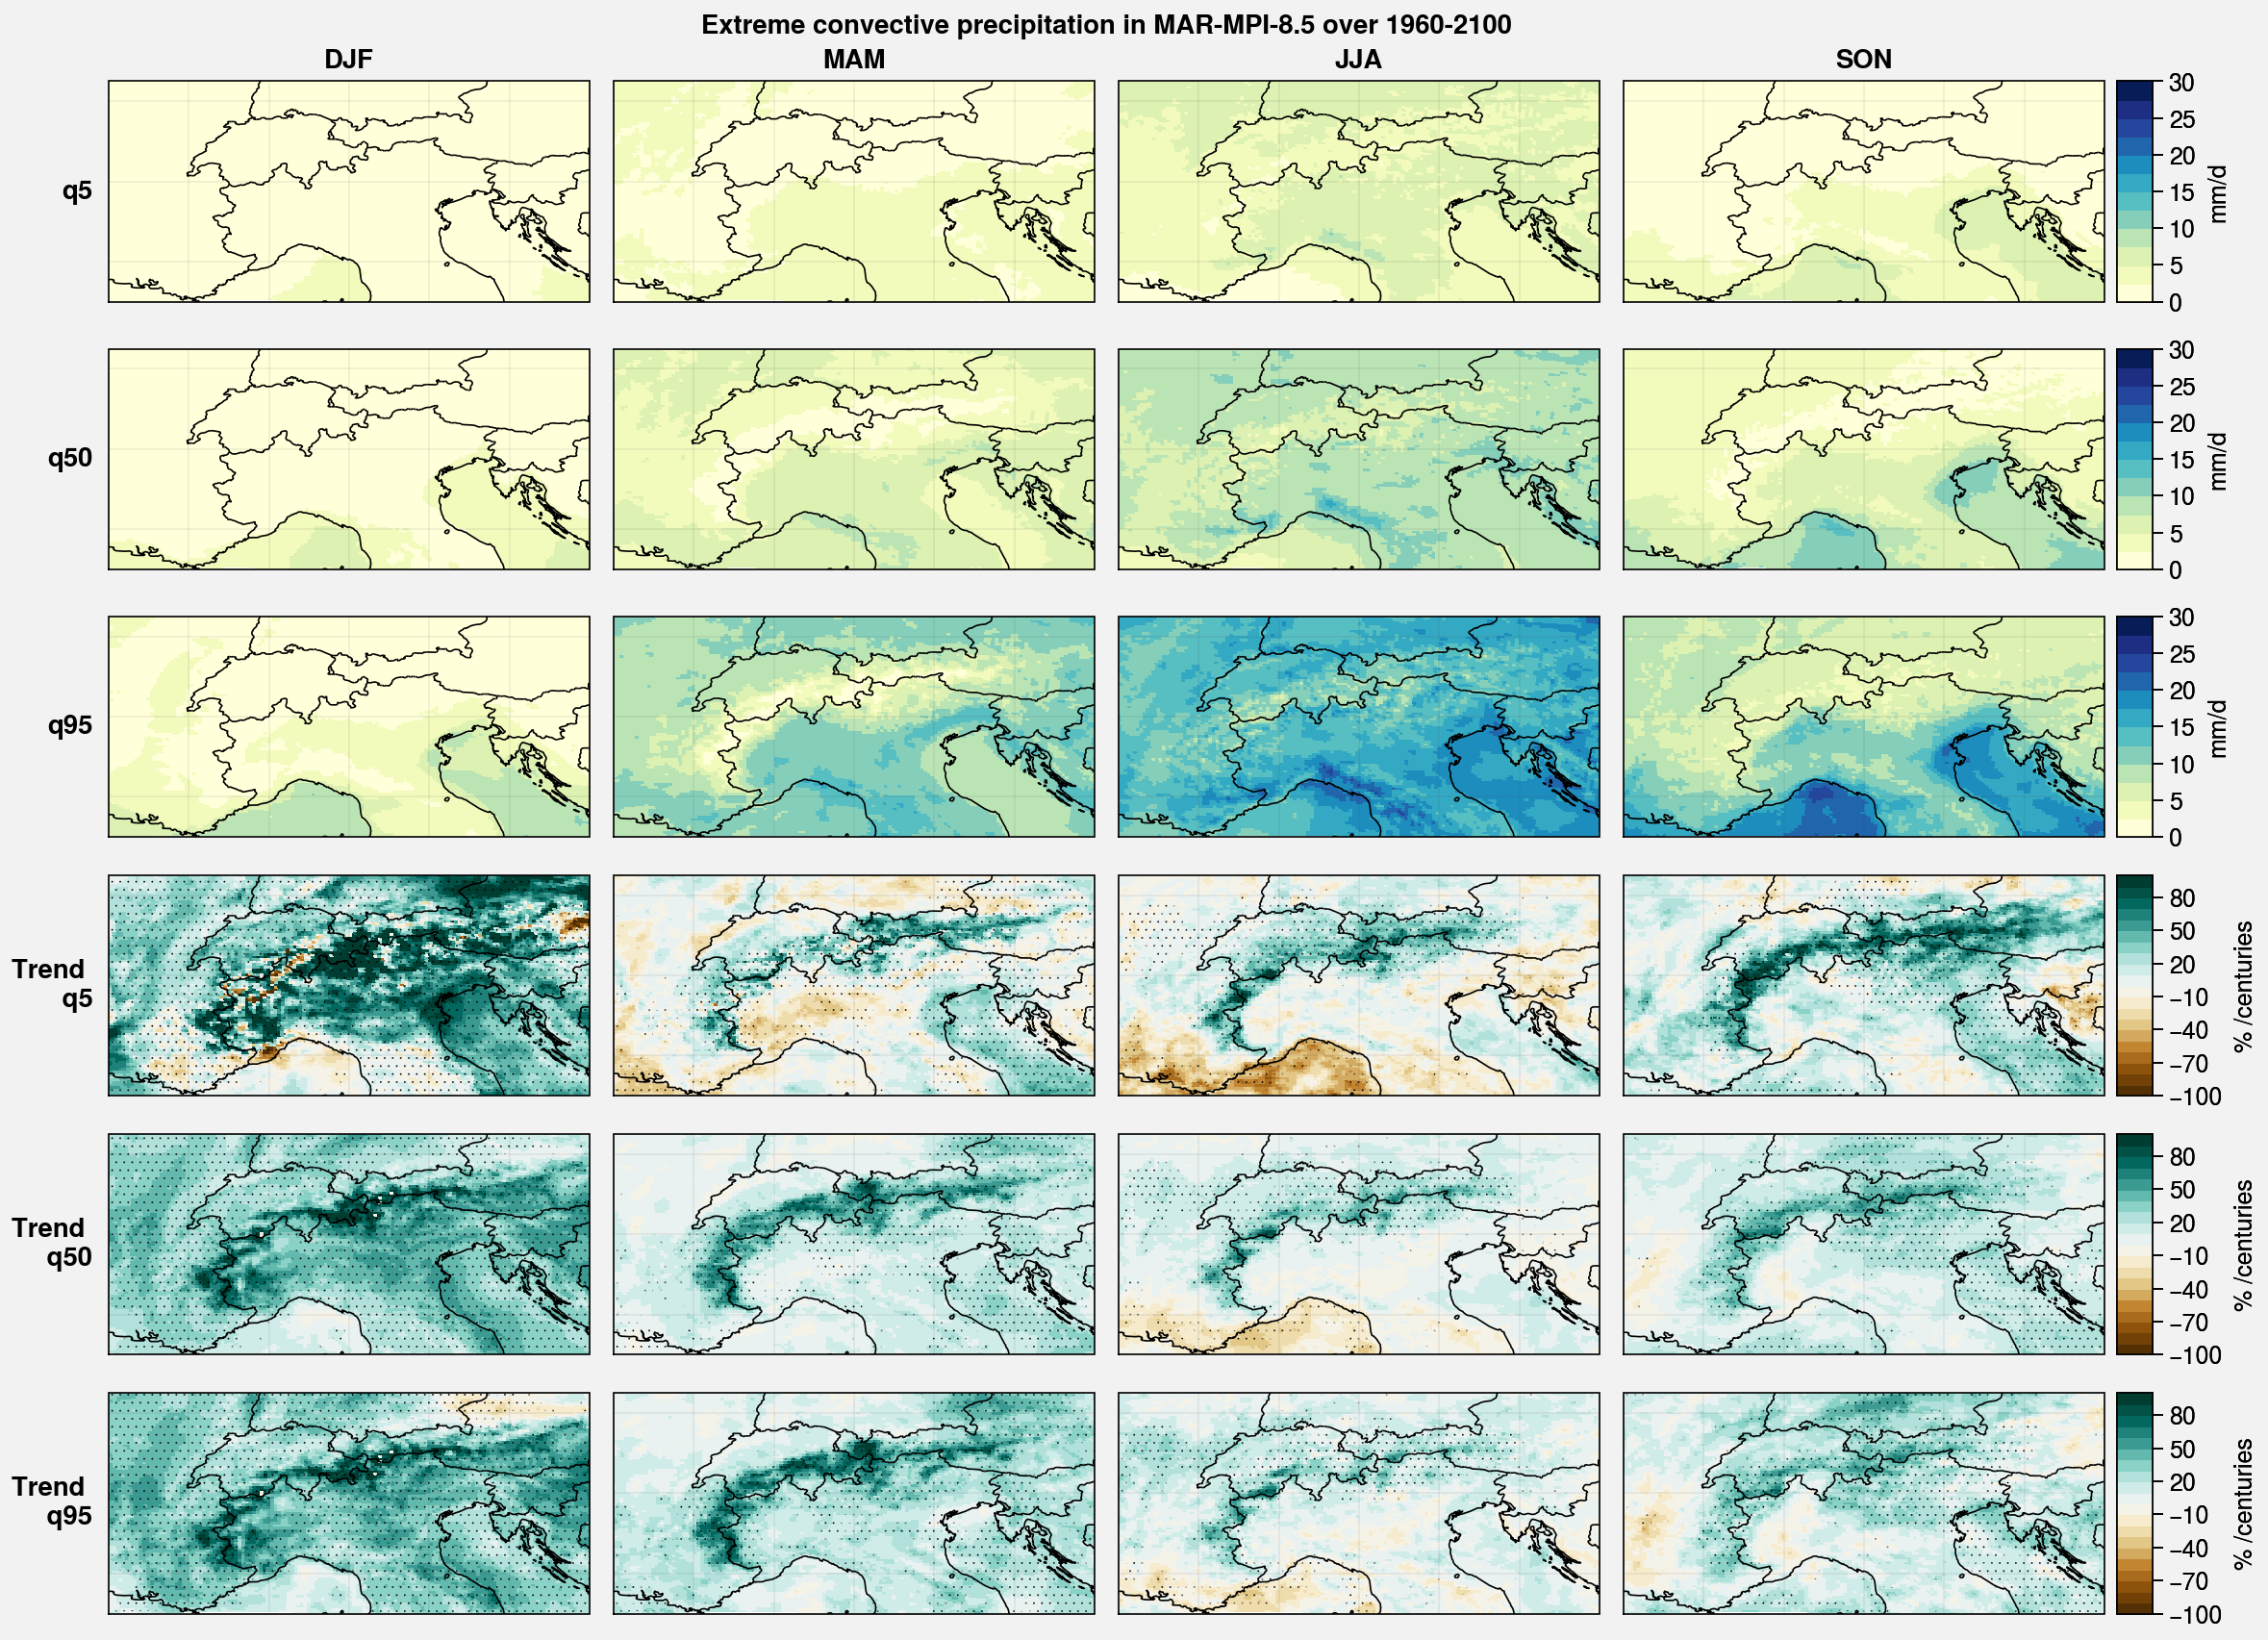

In [15]:
plot_mean_max_trends_model('MAR-MPI-8.5 over 1960-2100')